In [1]:
# !pip install matplotlib

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 2.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.8/244.8 kB 4.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 5.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 3.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
from langchain import OpenAI
from langchain.chains import ConversationChain
# 五种会话记录
from langchain.chains.conversation.memory import ConversationBufferMemory, ConversationSummaryMemory, \
    ConversationBufferWindowMemory, ConversationSummaryBufferMemory
from langchain.memory import ConversationTokenBufferMemory
from langchain.callbacks import get_openai_callback
import os

In [2]:
from dotenv import load_dotenv
import os
from langchain_community.llms.cloudflare_workersai import CloudflareWorkersAI
from langchain_community.llms.tongyi import Tongyi
from langchain_openai import ChatOpenAI

load_dotenv(override=True)

account_id = os.getenv('CF_ACCOUNT_ID')
api_token = os.getenv('CF_API_TOKEN')
print(account_id)
print(api_token)

# CloudflareWorkersAI
model = '@cf/meta/llama-3-8b-instruct'
cf_llm = CloudflareWorkersAI(
    account_id=account_id,
    api_token=api_token,
    model=model
)

DASHSCOPE_API_KEY = os.getenv('DASHSCOPE_API_KEY')
print(DASHSCOPE_API_KEY)

# qwen
qw_llm = Tongyi(
    model='qwen2-1.5b-instruct'
)

# qwen 兼容 openai的接口
qw_llm_openai = ChatOpenAI(
    openai_api_base='https://dashscope.aliyuncs.com/compatible-mode/v1',
    openai_api_key=DASHSCOPE_API_KEY,
    model_name="qwen2-1.5b-instruct",
    temperature=0,
    streaming=True,
    verbose=True,
)

api_key = os.getenv('OPENAI_API_KEY')
base_url = os.getenv('OPENAI_API_BASE')
print(api_key)
print(base_url)

# openai/moonshot
ms_llm = ChatOpenAI(
    openai_api_base=base_url,
    openai_api_key=api_key,
    model_name="moonshot-v1-8k",
    temperature=0.7,
)

8483c3ec7a0cbc54a8d660b5b9002b04
Gcllof8ze6dgtcqFI5FQZ2SD_5tfCD4Db7NuS6jn
sk-01c5003340c3453b934052d737d45e01
sk-UGVpjuTwo2Q8pewoqUDfckw1A0pbSDli9ElFMeS9WareKknG
https://api.moonshot.cn/v1/


In [6]:
QUERIES = [
    "My interest is to explore the options of scaling Ethereum",
    "Could you please elaborate more on sharding? Try to use at least 1000 words.",
    "What are the cons of sharding?"
    # "What should I learn if I decide to work on Ethereum?",
    # "What are the most important skills for a blockchain developer?",
    # "I have some basic understanding of smart contracts. Other than the basic programming skills, what else should I learn? I know NFT is pretty popular, what should I be capable of doing with NFT?",
    # "Opensea is one of the most popular NFT marketplace. What's its architecture? How can I build something similar?",
    # "How can I run such a marketplace on Ethereum? What's the cost of running such a marketplace? I would like to know the typical business model of such a marketplace.",
    # "In terms of marketing, as more and more NFT collections are published on Opensea, how can my marketplace compete with them? What's the potential opportunity for me to win the battle?",
    # "What are the most popular NFT collections on Opensea? What's the typical price of a NFT collection? How can I get a NFT collection on Opensea?"
]

In [4]:
def track_tokens_usage(chain, query, tokens, requests):
    with get_openai_callback() as cb:
        result = chain.invoke(query)
        print(f'Total tokens: {cb.total_tokens}')
        print(f'Requests: {cb.successful_requests}')
        tokens.append(cb.total_tokens)
        requests.append(cb.successful_requests)

    return result

In [5]:
def start_conversation(llm, queries, memory_type):
    chain = ConversationChain(llm=llm, memory=memory_type)
    tokens = []
    requests = []
    for query in queries:
        print(f'Query: {query}')
        result = track_tokens_usage(chain, query, tokens, requests)
        print(f'Result: {result}')
        print('')

    return tokens, requests

In [7]:
tokens1, requests1 = start_conversation(qw_llm_openai, QUERIES, ConversationBufferMemory())

Query: My interest is to explore the options of scaling Ethereum
Total tokens: 0
Requests: 0
Result: {'input': 'My interest is to explore the options of scaling Ethereum', 'history': '', 'response': 'Hello! I\'m happy to help you with your exploration of scaling Ethereum. Let\'s start by understanding what scaling means in this context. Scaling refers to the process of increasing the efficiency or capacity of a system, such as blockchain networks like Ethereum. This can be achieved through various methods, including adding more nodes, reducing transaction fees, or using more advanced consensus mechanisms.\nNow that we have a basic understanding of what scaling entails, let me provide some information on the options for scaling Ethereum. One approach is called "sharding," which involves dividing the network into smaller, more manageable pieces known as shards. Each shard would handle a portion of the transactions, leading to increased scalability and reduced latency. Another option is "

In [8]:
tokens1, requests1

([0, 0, 0], [0, 0, 0])

In [10]:
(tokens2, requests2) = start_conversation(qw_llm_openai, QUERIES, ConversationSummaryMemory(llm=qw_llm_openai))

Query: My interest is to explore the options of scaling Ethereum
Total tokens: 0
Requests: 0
Result: {'input': 'My interest is to explore the options of scaling Ethereum', 'history': '', 'response': "Hello! I'm happy to help you with your exploration of scaling Ethereum. Let's start by understanding what scaling means in this context. Scaling refers to the process of increasing the efficiency or capacity of a system, such as blockchain networks like Ethereum. This can be achieved through various methods, including adding more nodes, reducing transaction fees, or using more advanced consensus mechanisms.\nNow that we have a basic understanding of what scaling means, let me tell you about some potential options for scaling Ethereum. One approach is to increase the number of nodes on the network, which would allow for more transactions to be processed simultaneously. Another option is to use smart contracts to reduce the need for manual verification, making the network more efficient. Add


KeyboardInterrupt



In [ ]:
# k 表示记录最近的几次问与答数据，因此模型不知道更早的对话记录
(tokens3, requests3) = start_conversation(qw_llm_openai, QUERIES, ConversationBufferWindowMemory(k=2))

In [ ]:
# ConversationSummaryBufferMemory ： 
# 在 token未达到 max_token_limit 之前，使用Buffer 如实地记录
# 在 token 超过 max_token_limit 之后，使用Summary 如实地记录
(tokens4, requests4) = start_conversation(qw_llm_openai, QUERIES, ConversationSummaryBufferMemory(
    llm=qw_llm_openai,
    max_token_limit=600
))

Matplotlib is building the font cache; this may take a moment.


NameError: name 'tokens2' is not defined

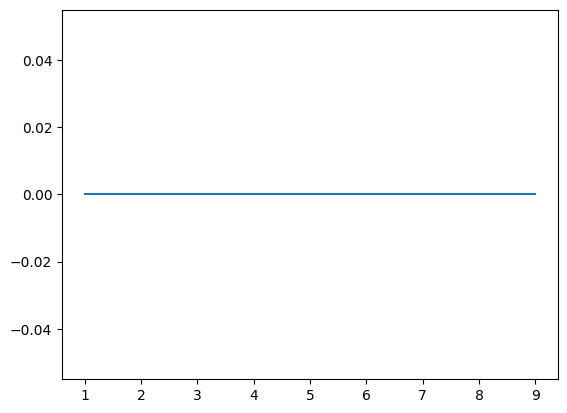

In [11]:
# matplotlib 是 Python 中一个广泛使用的绘图库。
# 它能够创建各种静态、动态和交互式的可视化图表，包括线图、柱状图、饼图、直方图、散点图等等，为数据分析和展示提供了强大的支持。
import matplotlib.pyplot as plt

xs = range(1, len(QUERIES) + 1)
plt.plot(xs, tokens1, label='Buffer Memory')
plt.plot(xs, tokens2, label='Summary Memory')
plt.plot(xs, tokens3, label='Buffer Window Memory')
plt.plot(xs, tokens4, label='Summary Buffer Memory')

plt.xlabel('Index of Queries')
plt.ylabel('Tokens')
plt.title('Tokens Usage')
plt.legend()
plt.show()

In [4]:
from langchain.memory import ConversationTokenBufferMemory

# from langchain.chains.conversation.memory import ConversationTokenBufferMemory

memory = ConversationTokenBufferMemory(llm=qw_llm_openai, max_token_limit=10)
memory.save_context({"input": "hi"}, {"output": "whats up"})
memory.save_context({"input": "not much you"}, {"output": "not much"})

NotImplementedError: get_num_tokens_from_messages() is not presently implemented for model cl100k_base. See https://platform.openai.com/docs/guides/text-generation/managing-tokens for information on how messages are converted to tokens.

In [10]:
from langchain.chains.conversation.base import ConversationChain
# from langchain.chains import ConversationChain
from langchain.chains.conversation.memory import ConversationBufferMemory, ConversationSummaryMemory, \
    ConversationBufferWindowMemory, ConversationSummaryBufferMemory

result = ConversationChain(llm=qw_llm_openai, memory=ConversationBufferMemory())


In [11]:
result.invoke('nice to meet you')

{'input': 'nice to meet you',
 'history': '',
 'response': 'Hello! Nice to meet you too! How can I assist you today?'}